In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
#Importing Dataset
df=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')

# EDA

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
# Finding Null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Visualisation

<ipython-input-11-f590dae539f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['platelets'])


<Axes: xlabel='platelets', ylabel='Density'>

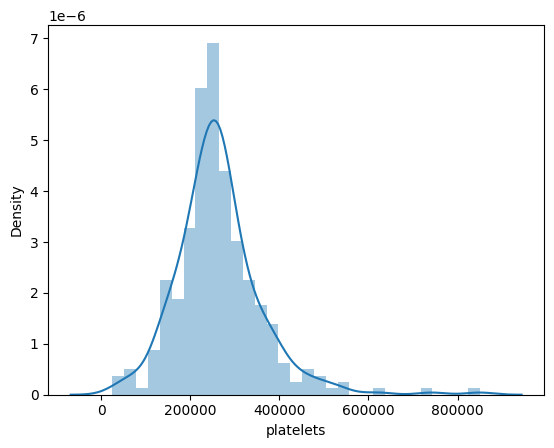

In [11]:
sns.distplot(df['platelets'])

<Axes: >

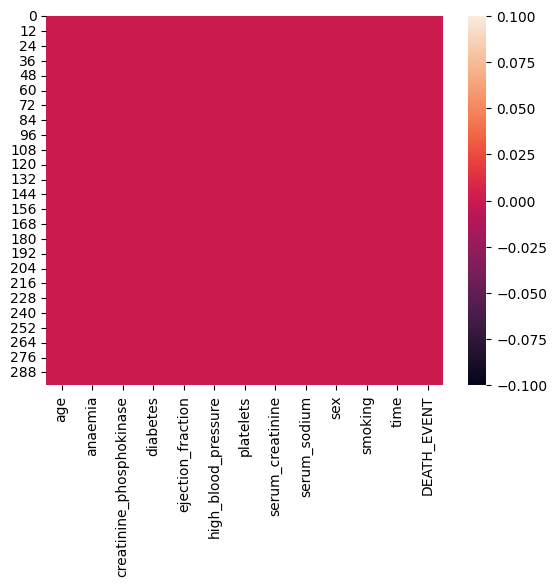

In [12]:
sns.heatmap(df.isnull())

# Model Building

In [13]:
# Splitting data
X=df.iloc[:,0:12]
y=df.iloc[:,-1]

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [15]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [16]:
x

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [19]:
# Creating Function
def predict(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    trainac=model.score(xtrain,ytrain)
    testac=model.score(xtest,ytest)
    
    print(f"Triaing Accuracy {trainac}\nTesting Accuracy {testac}")
    

In [20]:
# KNN
model_knn=KNeighborsClassifier(n_neighbors=6)
model_knn.fit(xtrain,ytrain)
ypred_knn=model_knn.predict(xtest)
trainac_knn=model_knn.score(xtrain,ytrain)
testac_knn=model_knn.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_knn}\nTesting Accuracy {testac_knn}")  

Triaing Accuracy 0.7723214285714286
Testing Accuracy 0.7733333333333333


In [21]:
trainac=[]
testac=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

Text(0, 0.5, 'Accuracy')

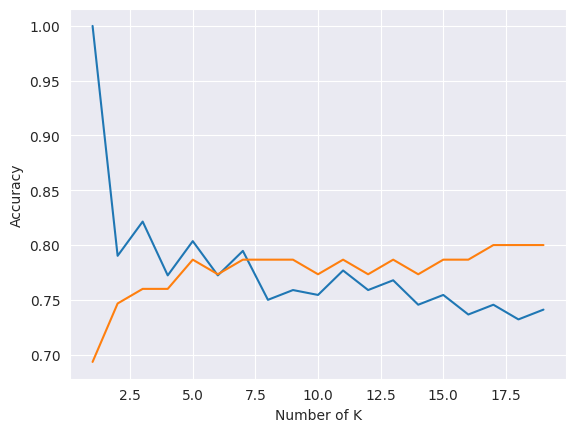

In [22]:
sns.set_style(style='darkgrid')

plt.plot(range(1,20), trainac)
plt.plot(range(1,20),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')

In [23]:
# Random Forest Classifier

model_rf=RandomForestClassifier()
model_rf.fit(xtrain,ytrain)
ypred_rf=model_rf.predict(xtest)
trainac_rf=model_rf.score(xtrain,ytrain)
testac_rf=model_rf.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_rf}\nTesting Accuracy {testac_rf}") 

Triaing Accuracy 1.0
Testing Accuracy 0.9066666666666666


In [24]:
from sklearn.svm import SVC

In [25]:

model_SVC_rbf=SVC(kernel='rbf')
model_SVC_rbf.fit(xtrain,ytrain)
ypred_SVC_rbf=model_SVC_rbf.predict(xtest)
trainac_SVC_rbf=model_SVC_rbf.score(xtrain,ytrain)
testac_SVC_rbf=model_SVC_rbf.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_SVC_rbf}\nTesting Accuracy {testac_SVC_rbf}") 

Triaing Accuracy 0.8883928571428571
Testing Accuracy 0.88


In [26]:

model_SVC_poly=SVC(kernel='poly')
model_SVC_poly.fit(xtrain,ytrain)
ypred_SVC_poly=model_SVC_poly.predict(xtest)
trainac_SVC_poly=model_SVC_poly.score(xtrain,ytrain)
testac_SVC_poly=model_SVC_poly.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_SVC_poly}\nTesting Accuracy {testac_SVC_poly}") 

Triaing Accuracy 0.8616071428571429
Testing Accuracy 0.7866666666666666


In [27]:

model_SVC_linear=SVC(kernel='linear')
model_SVC_linear.fit(xtrain,ytrain)
ypred_SVC_linear=model_SVC_linear.predict(xtest)
trainac_SVC_linear=model_SVC_linear.score(xtrain,ytrain)
testac_SVC_linear=model_SVC_linear.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_SVC_linear}\nTesting Accuracy {testac_SVC_linear}") 

Triaing Accuracy 0.8258928571428571
Testing Accuracy 0.8666666666666667


In [28]:

        
model_SVC_sigmoid=SVC(kernel='sigmoid')
model_SVC_sigmoid.fit(xtrain,ytrain)
ypred_SVC_sigmoid=model_SVC_sigmoid.predict(xtest)
trainac_SVC_sigmoid=model_SVC_sigmoid.score(xtrain,ytrain)
testac_SVC_sigmoid=model_SVC_sigmoid.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_SVC_sigmoid}\nTesting Accuracy {testac_SVC_sigmoid}") 

Triaing Accuracy 0.78125
Testing Accuracy 0.8266666666666667


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:

model_LR=LogisticRegression()
model_LR.fit(xtrain,ytrain)
ypred_LR=model_SVC_sigmoid.predict(xtest)
trainac_LR=model_SVC_sigmoid.score(xtrain,ytrain)
testac_LR=model_SVC_sigmoid.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_LR}\nTesting Accuracy {testac_LR}") 

Triaing Accuracy 0.78125
Testing Accuracy 0.8266666666666667


In [31]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model=Sequential()
model.add(Dense(18,imput_dim=8,activation='Sigmoid'))
model.add(Dense(8,activation='Sigmoid'))
model.add(Dense(1,activation='Sigmoid'))

In [32]:
model=Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history=model.fit(x=xtrain,y=ytrain,validation_split=0.30,epochs=300,batch_size=10)

Epoch 1/300
16/16 [==============================] - 1s 19ms/step - loss: 0.7014 - accuracy: 0.5321 - val_loss: 0.6862 - val_accuracy: 0.6176
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5833 - val_loss: 0.6636 - val_accuracy: 0.6618
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6603 - val_loss: 0.6463 - val_accuracy: 0.7059
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6987 - val_loss: 0.6282 - val_accuracy: 0.6912
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.6923 - val_loss: 0.6113 - val_accuracy: 0.7500
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.6987 - val_loss: 0.5967 - val_accuracy: 0.7647
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7308 - val_loss: 0.5781 - val_accuracy: 0.7647
Epoch 8/300


In [35]:
scores=model.evaluate(xtrain,ytrain)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

7/7 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.9018
accuracy: 90.18%


In [36]:
scores=model.evaluate(xtest,ytest)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

3/3 [==============================] - 0s 8ms/step - loss: 0.9422 - accuracy: 0.8000
accuracy: 80.00%


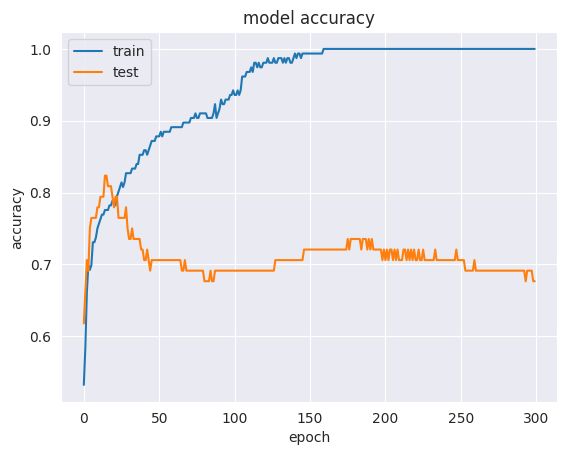

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [38]:
Models={"Models":["KNN","Random_Forest_Classifier","SVC_rbf","SVC_Poly","SVC_linear","SVC_sigmoid","Logistic_Regression","ANN"],\
       "Training_Accuracy":[model_knn.score(xtrain,ytrain),model_rf.score(xtrain,ytrain),model_SVC_rbf.score(xtrain,ytrain),model_SVC_poly.score(xtrain,ytrain),model_SVC_linear.score(xtrain,ytrain),model_SVC_sigmoid.score(xtrain,ytrain),model_SVC_sigmoid.score(xtrain,ytrain),model.evaluate(xtrain,ytrain)],\
       "Testing_Accuracy":[model_knn.score(xtest,ytest),model_rf.score(xtest,ytest),model_SVC_rbf.score(xtest,ytest),model_SVC_poly.score(xtest,ytest),model_SVC_linear.score(xtest,ytest),model_SVC_sigmoid.score(xtest,ytest),model_SVC_sigmoid.score(xtest,ytest),model.evaluate(xtest,ytest)]}

Scores=pd.DataFrame(Models)

3/3 [==============================] - 0s 4ms/step - loss: 0.9422 - accuracy: 0.8000


In [39]:
Scores 

,Models,Training_Accuracy,Testing_Accuracy
0,KNN,0.772321,0.773333
1,Random_Forest_Classifier,1.0,0.906667
2,SVC_rbf,0.888393,0.88
3,SVC_Poly,0.861607,0.786667
4,SVC_linear,0.825893,0.866667
5,SVC_sigmoid,0.78125,0.826667
6,Logistic_Regression,0.78125,0.826667
7,ANN,"[0.5606646537780762, 0.9017857313156128]","[0.9422306418418884, 0.800000011920929]"


In [53]:
 ypred_LR=model_SVC_sigmoid.predict([xtest[21]])

In [54]:
ypred_LR

array([1])